# Overview
1. Input data is the enriched CVSS score with the Exploit Code Maturity/Exploitability (E) Temporal Metric cvss-bt.csv from https://github.com/t0sche/cvss-bt
2. CVSS counts
   1. Plot count of CVEs **at/below** a CVSS score for both CVSS Base Score and CVSS BT (Base and Threat) Score.
   2. Plot count of CVEs **at/above** a CVSS score for both CVSS Base Score and CVSS BT (Base and Threat) Score.
      1. For remediation at/above a CVSS score
3. CVSS Base Threat Exploitability Ratings (Exploitation Support)
   1. Bar Chart
   2. Parallel Categories Diagram
4. CVSS Base + Exploitation Focus

In [680]:
# Need these for the logic
import pandas as pd
from cvss import CVSS2, CVSS3, CVSS4

# Need these for the plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
from IPython.display import Image #to display images in github from this notebook



# CVSS

In [681]:
df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")
df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_37052/3314376690.py:1: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.015,False,False,False,False,False,False
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.0006,False,False,False,False,False,False
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False


In [682]:
# Drop rows where 'cvss' column value is zero
df = df[df['base_score'] != 0]
df = df[df['cvss-bt_score'] != 0]
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.015,False,False,False,False,False,False
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.0006,False,False,False,False,False,False
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False


In [683]:
df.base_vector.value_counts()

CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H    15613
AV:N/AC:L/Au:N/C:P/I:P/A:P                      14068
AV:N/AC:M/Au:N/C:N/I:P/A:N                       8644
CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N     7743
CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H     7172
                                                ...  
CVSS:3.0/AV:A/AC:L/PR:L/UI:N/S:C/C:N/I:L/A:N        1
CVSS:3.0/AV:A/AC:L/PR:N/UI:N/S:C/C:N/I:L/A:N        1
CVSS:3.0/AV:N/AC:H/PR:N/UI:R/S:C/C:H/I:N/A:N        1
CVSS:3.0/AV:P/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H        1
CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:C/C:H/I:N/A:L        1
Name: base_vector, Length: 1909, dtype: int64

## Cumulative Count of CVEs starting at CVSS 0
This is the count of CVEs at or below a given CVSS score

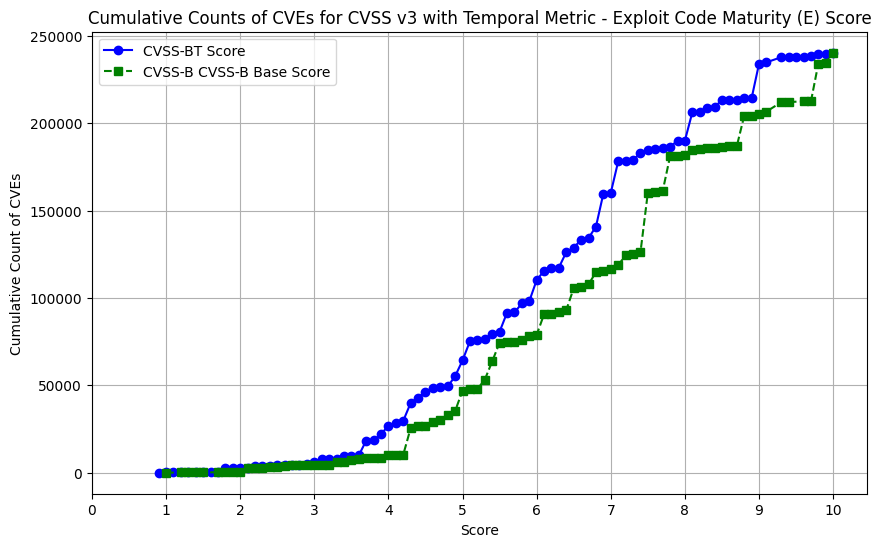

In [684]:
# Count CVEs above cvss-bt_score for all cvss-bt_score
cvss_bt_counts = df['cvss-bt_score'].value_counts().sort_index().cumsum()

# Count CVEs above base_score for all base_score
base_counts = df['base_score'].value_counts().sort_index().cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cvss_bt_counts.index, cvss_bt_counts.values, marker='o', linestyle='-', color='blue', label='CVSS-BT Score')
plt.plot(base_counts.index, base_counts.values, marker='s', linestyle='--', color='green', label='CVSS-B CVSS-B Base Score')
plt.xlabel('Score')
plt.ylabel('Cumulative Count of CVEs')
plt.title('Cumulative Counts of CVEs for CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score')
plt.xticks(range(11))
plt.legend()
plt.grid(True)
plt.savefig('../images_out/cvss-bt-counts.png')

plt.show()



## Cumulative Count of CVEs starting at CVSS 10
This is the count of CVEs **at/above** a given CVSS score i.e. for a given CVSS score, how many CVEs **at/above** that score?

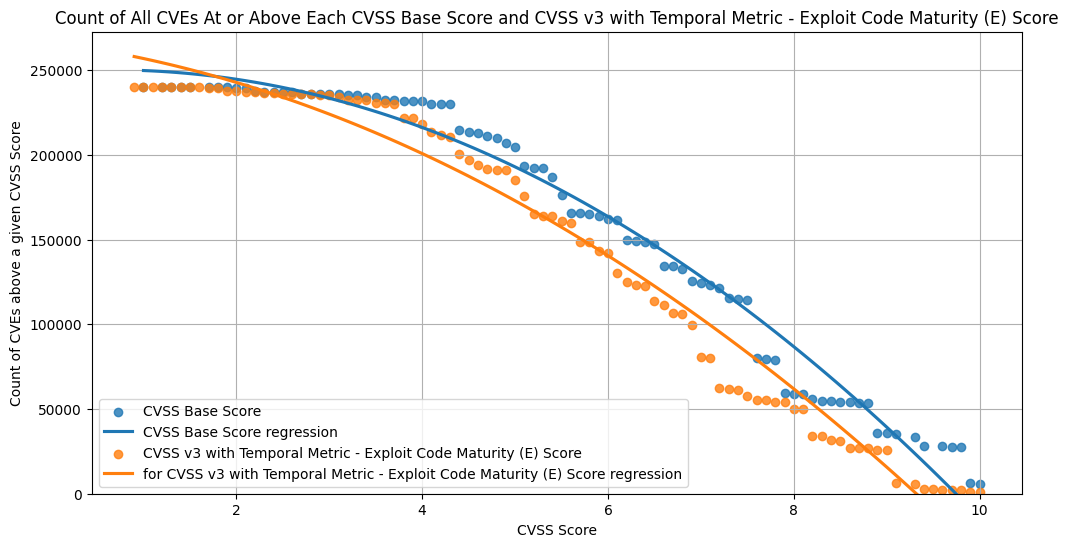

In [685]:
# Calculate the cumulative sum of counts above each 'BaseScore' value
base_score_counts = df['base_score'].value_counts().sort_index()
cumulative_counts = base_score_counts[::-1].cumsum()[::-1]  # Reverse the order to start from 0

# Calculate the cumulative sum of counts above each 'BaseScore' value
cvss_bt_score_counts = df['cvss-bt_score'].value_counts().sort_index()
cvss_bt_cumulative_counts = cvss_bt_score_counts[::-1].cumsum()[::-1]  # Reverse the order to start from 0

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.regplot(x=cumulative_counts.index, y=cumulative_counts.values, order=2, ci=None)
sns.regplot(x=cvss_bt_cumulative_counts.index, y=cvss_bt_cumulative_counts.values, order=2, ci=None)


plt.title('Count of All CVEs At or Above Each CVSS Base Score and CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score')
plt.xlabel('CVSS Score')
plt.ylabel('Count of CVEs above a given CVSS Score')
plt.ylim(0)  # Set the x-axis limits from 0.1 to 1
plt.legend(['CVSS Base Score', 'CVSS Base Score regression', 'CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score', 'for CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score regression'])
plt.grid()
plt.savefig('../images_out/cvss-bt-counts_above.png')
plt.show()


## CVSS Ratings

In [686]:
# Define function to categorize scores
def categorize_score(score):
    if score >= 0.1 and score <= 3.9:
        return 'low'
    elif score >= 4.0 and score <= 6.9:
        return 'medium'
    elif score >= 7.0 and score <= 8.9:
        return 'high'
    elif score >= 9.0 and score <= 10.0:
        return 'critical'
    else:
        return 'invalid'

# Apply categorization to both base_score and cvss-bt_score
df['base_score_category'] = df['base_score'].apply(categorize_score)
df['cvss-bt_score_category'] = df['cvss-bt_score'].apply(categorize_score)

# Count the number of CVEs in each category
base_score_counts = df['base_score_category'].value_counts().reindex(['low', 'medium', 'high', 'critical'], fill_value=0)
cvss_bt_score_counts = df['cvss-bt_score_category'].value_counts().reindex(['low', 'medium', 'high', 'critical'], fill_value=0)

# Calculate percentages
base_score_perc = base_score_counts / base_score_counts.sum() * 100
cvss_bt_score_perc = cvss_bt_score_counts / cvss_bt_score_counts.sum() * 100

# Create traces for base score categories
trace_base_low = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['low']],
    name='Low',
    marker=dict(color='green')
)
trace_base_medium = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['medium']],
    name='Medium',
    marker=dict(color='orange')
)
trace_base_high = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['high']],
    name='High',
    marker=dict(color='pink')
)
trace_base_critical = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['critical']],
    name='Critical',
    marker=dict(color='red')
)

# Create traces for CVSS-BT score categories
trace_cvss_bt_low = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['low']],
    name='Low',
    marker=dict(color='green')
)
trace_cvss_bt_medium = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['medium']],
    name='Medium',
    marker=dict(color='orange')
)
trace_cvss_bt_high = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['high']],
    name='High',
    marker=dict(color='pink')
)
trace_cvss_bt_critical = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['critical']],
    name='Critical',
    marker=dict(color='red')
)

# Layout
layout = go.Layout(
    title='CVEs by CVSS-B Base and CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Ratings',
    xaxis=dict(title='CVSS Rating'),
    yaxis=dict(title='Percentage of CVEs'),
    barmode='stack',
    bargroupgap=0.1,
    bargap=0.2,
    height=500,
    width=600
)

# Create figure
fig = go.Figure(
    data=[trace_base_low, trace_base_medium, trace_base_high, trace_base_critical,
          trace_cvss_bt_low, trace_cvss_bt_medium, trace_cvss_bt_high, trace_cvss_bt_critical],
    layout=layout
)
# Show plot
fig.show()

fig.write_image("../images_out/cvss_bt_bar.png") 

In [687]:
cvss_bt_sankey_data = df.groupby(['base_score_category', 'cvss-bt_score_category']).size().reset_index(name='count')
cvss_bt_sankey_data

,base_score_category,cvss-bt_score_category,count
0,critical,critical,25970
1,critical,high,10049
2,high,high,44585
3,high,medium,44072
4,low,low,8440
5,medium,low,13686
6,medium,medium,93475


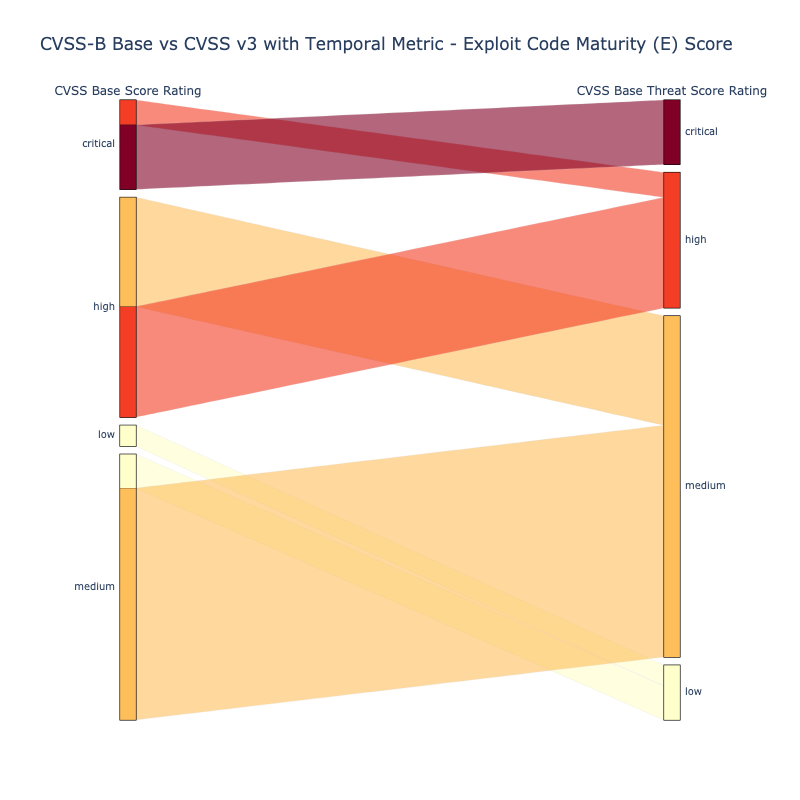

In [688]:
# Mapping dictionary to convert numbers back to categorical values
category_to_number = {'critical': 4, 'high': 3, 'medium': 2, 'low': 1}

cvss_bt_sankey_data['cvss_bt_score_category_color'] = cvss_bt_sankey_data['cvss-bt_score_category'].map(category_to_number)
color = cvss_bt_sankey_data['cvss_bt_score_category_color'];

colorscale = 'YlOrRd' #Yellow Orange Red
fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'CVSS Base Score Rating', 'values': cvss_bt_sankey_data['base_score_category']},
        {'label': 'CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score', 'values': cvss_bt_sankey_data['cvss-bt_score_category']},
    ],
    line={'color': color, 'colorscale': colorscale},
    counts=cvss_bt_sankey_data['count'],
))
fig.update_layout(
    title='CVSS-B Base vs CVSS v3 with Temporal Metric - Exploit Code Maturity (E) Score',
    autosize=False,
    width=800,
    height=800,
)
fig.show()

fig.write_image("../images_out/cvss_bt_parcat.png") 

Image(filename='../images_out/cvss_bt_parcat.png') #display plot when viewing in github


## CVSS with Exploitation Focus

In [689]:
df['base_score_category'].value_counts()

medium      107161
high         88657
critical     36019
low           8440
Name: base_score_category, dtype: int64

### Parallel Categories Diagram

In [690]:

df['weaponized'] = (df['metasploit'] | df['nuclei']) 
df['kev'] = (df['cisa_kev'] | df['vulncheck_kev']) 
df['poc'] = (df['poc_github'] | df['exploitdb']) 

# Define a function to map values based on conditions
def map_exploitation(row):
    #if row['kev'] and row['weaponized']:
    #    return 'kev_weaponized'
    #elif row['kev']:
    if row['kev']:
        return 'kev'
    elif row['weaponized']:
        return 'weaponized'
    elif row['poc']:
        return 'poc'
    else:
        return 'None'

# Apply the function to create the 'exploitation' column
df['exploitation'] = df.apply(map_exploitation, axis=1)
df['exploitation'].value_counts()


None          211658
poc            23072
weaponized      3583
kev             1964
Name: exploitation, dtype: int64

In [691]:
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,exploitdb,metasploit,nuclei,poc_github,base_score_category,cvss-bt_score_category,weaponized,kev,poc,exploitation
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,True,False,False,False,critical,critical,False,False,True,poc
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,False,False,False,False,critical,high,False,False,False,None
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,False,False,False,False,high,medium,False,False,False,None
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,False,False,False,False,medium,low,False,False,False,None
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,False,False,False,False,critical,high,False,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,False,medium,medium,False,False,False,None
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,False,critical,critical,False,False,False,None
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,False,high,high,False,False,False,None
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,False,critical,critical,False,False,False,None


In [692]:
def rbp_score(row):
    base_score_category = row['base_score_category']
    weaponized = row['weaponized']
    kev = row['kev']
    poc = row['poc']
     
    if ((base_score_category == 'critical') and kev):
        return 10
    elif (base_score_category == 'critical') and weaponized:
        return 9
    elif (base_score_category == 'high') and kev:
        return 8
    elif (base_score_category == 'high') and weaponized:
        return 7
    elif (base_score_category == 'critical') and poc:
        return 6
    elif (base_score_category == 'high') and poc:
        return 5
    elif (base_score_category == 'critical'):
        return 4
    elif (base_score_category == 'high'):
        return 3
    elif (base_score_category == 'medium'):
        return 2
    else:
        return 1

# Apply scoring function 
df['rbp_score'] = df.apply(rbp_score, axis=1)

df['rbp_score'].value_counts()

2     107161
3      76801
4      30924
5       9915
1       8440
6       3159
9       1097
7       1083
8        858
10       839
Name: rbp_score, dtype: int64

### Parallel Categories Diagram

In [693]:
# Aggregate data to get counts for each combination
sankey_data = df.groupby(['base_score_category', 'exploitation', 'rbp_score']).size().reset_index(name='count')

In [694]:
sankey_data

,base_score_category,exploitation,rbp_score,count
0,critical,None,4,30924
1,critical,kev,10,839
2,critical,poc,6,3159
3,critical,weaponized,9,1097
4,high,None,3,76801
5,high,kev,8,858
6,high,poc,5,9915
7,high,weaponized,7,1083
8,low,None,1,7838
9,low,kev,1,8


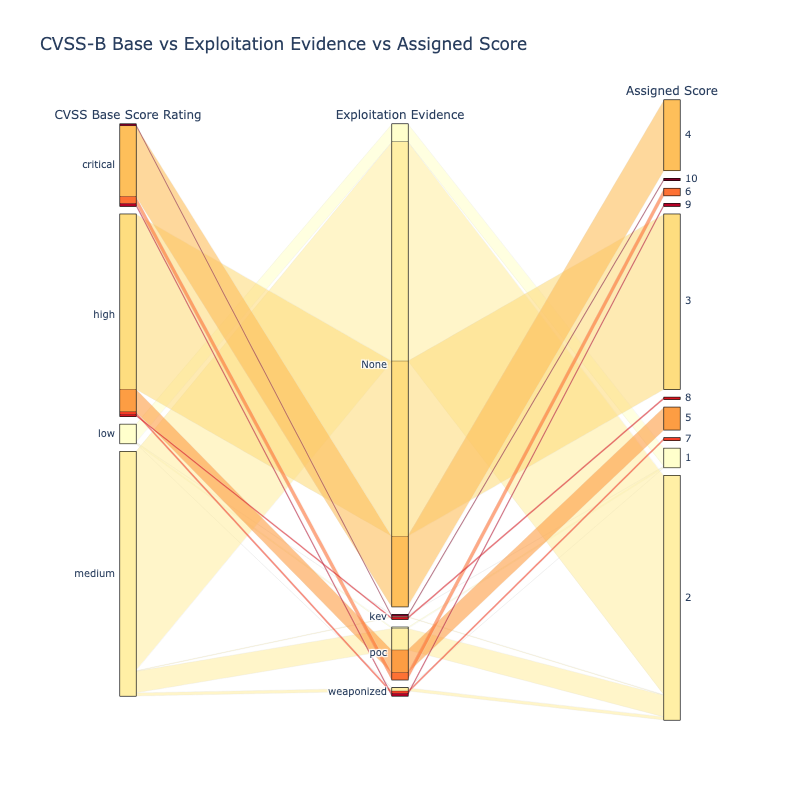

In [695]:
color = sankey_data['rbp_score'];
colorscale = 'YlOrRd' #Yellow Orange Red
fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'CVSS Base Score Rating', 'values': sankey_data['base_score_category']},
        {'label': 'Exploitation Evidence', 'values': sankey_data['exploitation']},
        {'label': 'Assigned Score', 'values': sankey_data['rbp_score']},
    ],
    line={'color': color, 'colorscale': colorscale},
    counts=sankey_data['count'],
))
fig.update_layout(
    title='CVSS-B Base vs Exploitation Evidence vs Assigned Score',
    autosize=False,
    width=800,
    height=800,
)
fig.show()

fig.write_image("../images_out/cvss_exploitation_parcat.png") 

Image(filename='../images_out/cvss_exploitation_parcat.png') #display plot when viewing in github


# SSVC

#TODO pull in the CVSS V3, 

In [696]:
# Function to convert CVSS vector string to dictionary
def cvss_vector_to_dict(cvss_vector):
    cvss_dict = {}
    elements = cvss_vector.split('/')
    for element in elements:
        key, value = element.split(':')
        cvss_dict[key] = value
    return cvss_dict


In [697]:

# Add cvss_vector_dict column
df['cvss_vector_dict'] = df['base_vector'].apply(cvss_vector_to_dict)

df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,nuclei,poc_github,base_score_category,cvss-bt_score_category,weaponized,kev,poc,exploitation,rbp_score,cvss_vector_dict
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,False,False,critical,critical,False,False,True,poc,6,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I..."
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,False,False,critical,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I..."
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,False,False,high,medium,False,False,False,None,3,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I..."
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,False,False,medium,low,False,False,False,None,2,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I..."
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,False,False,critical,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,medium,medium,False,False,False,None,2,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L..."
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,critical,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N..."
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,high,high,False,False,False,None,3,"{'CVSS': '3.1', 'AV': 'A', 'AC': 'L', 'PR': 'L..."
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,critical,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N..."


In [698]:
# Function to determine confidentialityImpact
def determine_confidentiality_impact(cvss_dict):
    if 'CVSS' in cvss_dict and cvss_dict['CVSS'] == '3.1':
        if 'C' in cvss_dict and cvss_dict['C'] == 'H':
            return "high"
        else:
            return "low"
    else:
        if 'C' in cvss_dict and cvss_dict['C'] == 'C':
            return "high"
        else:
            return "low"


In [699]:
# The CISA SSVC DT is codified as a CSV file - each row represents a possible full path through the tree.
# 36 paths/leaves in total: 3 x 2 x 2 x 3
# The Leaf column allows us to keep track of what leaf in the DT is associated with a Decision later on (where there are 36 leaves, but these are mapped to 5 Priorities: Act, Attend,...)
#dt_df = pd.read_csv('../cisa_ssvc_dt/DT_rbp.csv')

#dt_df

In [700]:
df['weaponized'] = (df['metasploit'] | df['nuclei']) 
df['kev'] = (df['cisa_kev'] | df['vulncheck_kev']) 
df['poc'] = (df['poc_github'] | df['exploitdb']) 

In [701]:
df[['epss'] == False]

KeyError: False

In [ ]:
# Convert the column to float with coercion
df['epss'] = pd.to_numeric(df['epss'], errors='coerce')

In [ ]:
EPSS_THRESHOLD_LOW = 0.1 #as described in presentation in https://github.com/theparanoids/PrioritizedRiskRemediation 

def exploitation_dt(row):
    if (row['kev'] | (row['epss'] >= EPSS_THRESHOLD_LOW) | row['weaponized']):
        return "active"
    elif (row['poc']):
        return "PoC"
    else:
        return "none"

In [ ]:

df['Exploitation'] = df.apply(exploitation_dt, axis=1)
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,poc_github,base_score_category,cvss-bt_score_category,weaponized,kev,poc,exploitation,rbp_score,cvss_vector_dict,Exploitation
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,False,critical,critical,False,False,True,poc,6,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",PoC
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,False,critical,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,False,high,medium,False,False,False,None,3,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,False,medium,low,False,False,False,None,2,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",none
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,False,critical,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,False,medium,medium,False,False,False,None,2,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...",none
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,critical,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,high,high,False,False,False,None,3,"{'CVSS': '3.1', 'AV': 'A', 'AC': 'L', 'PR': 'L...",none
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,critical,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none


In [ ]:
#V3 base score parameters
#https://www.first.org/cvss/v3-1/
#Low (L)	
#'availabilityImpact/'confidentialityImpact', 'integrityImpact'}
#High (H)
#None (N)

#https://www.first.org/cvss/v2/guide 
#Confidentiality/Integrity/Availability:
#None (N)	
#Partial (P)	
#Complete (C)

# Function to determine impact
def technical_impact_dt(cvss_dict):
    if (('CVSS' in cvss_dict and cvss_dict['CVSS'] == '3.1') and  cvss_dict['C'] == 'H' and cvss_dict['I'] == 'H')  or (('C' in cvss_dict and cvss_dict['C'] == 'C') and ('I' in cvss_dict and cvss_dict['I'] == 'C')):
        return "total"
    else:
        return "partial"


In [ ]:
df['TechnicalImpact'] = df['cvss_vector_dict'].apply(technical_impact_dt)
df


,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,weaponized,kev,poc,exploitation,rbp_score,cvss_vector_dict,Exploitation,impact,Automatable,TechnicalImpact
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,False,False,True,poc,6,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",PoC,total,yes,total
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes,total
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,False,False,False,None,3,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,no,total
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,False,False,False,None,2,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",none,partial,no,partial
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,None,2,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...",none,partial,no,partial
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes,total
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,None,3,"{'CVSS': '3.1', 'AV': 'A', 'AC': 'L', 'PR': 'L...",none,total,no,total
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes,total



https://www.first.org/cvss/v3-1/
V3 base score parameters
'availabilityImpact/'confidentialityImpact', 'integrityImpact'}
Low (L)	
High (H)
None (N)

'attackComplexity' AC
Low (L)	
High (H)

'attackVector', AV
Local (L)	
Adjacent Network (A)	
Network (N)
Physical (P)

'userInteraction', UI
None (N)
Required (R)

'privilegesRequired',  PR            
Low (L)	
High (H)
None (N)


https://www.first.org/cvss/v2/guide 

Access Vector (AV):
Local (L)	
Adjacent Network (A)	
Network (N)

Access Complexity (AC)
High (H)
Medium (M)
Low (L)

Authentication (Au)
Multiple (M)
Single (S)	
None (N)


In [ ]:
def automatable_dt(cvss_dict):    
    
    if ((('CVSS' in cvss_dict and cvss_dict['CVSS'] == '3.1') and  cvss_dict['UI'] == 'N' and cvss_dict['AC'] == 'L' and cvss_dict['PR'] != 'H' and cvss_dict['AV'] == 'N') or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))) :
    #(cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N')):
    #if ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
        return "yes"
    else:
        return "no"

In [ ]:
df['Automatable'] = df['cvss_vector_dict'].apply(automatable_dt)
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,cvss-bt_score_category,weaponized,kev,poc,exploitation,rbp_score,cvss_vector_dict,Exploitation,impact,Automatable
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,critical,False,False,True,poc,6,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",PoC,total,yes
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,medium,False,False,False,None,3,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,no
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,low,False,False,False,None,2,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",none,partial,no
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,high,False,False,False,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,medium,False,False,False,None,2,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...",none,partial,no
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,high,False,False,False,None,3,"{'CVSS': '3.1', 'AV': 'A', 'AC': 'L', 'PR': 'L...",none,total,no
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,critical,False,False,False,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes


In [ ]:
# The CISA SSVC DT is codified as a CSV file - each row represents a possible full path through the tree.
# 36 paths/leaves in total: 3 x 2 x 2 x 3
# The Leaf column allows us to keep track of what leaf in the DT is associated with a Decision later on (where there are 36 leaves, but these are mapped to 5 Priorities: Act, Attend,...)
dt_df = pd.read_csv('../cisa_ssvc_dt/DT_rbp.csv')

dt_df


,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority
0,1,active,yes,total,high,Act
1,2,active,yes,total,medium,Act
2,3,active,yes,total,low,Attend
3,4,active,yes,partial,high,Act
4,5,active,yes,partial,medium,Attend
5,6,active,yes,partial,low,Attend
6,7,active,no,total,high,Act
7,8,active,no,total,medium,Attend
8,9,active,no,total,low,Track
9,10,active,no,partial,high,Attend


In [ ]:

dt_df= dt_df.iloc[::3]
dt_df

,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority
0,1,active,yes,total,high,Act
3,4,active,yes,partial,high,Act
6,7,active,no,total,high,Act
9,10,active,no,partial,high,Attend
12,13,PoC,yes,total,high,Attend
15,16,PoC,yes,partial,high,Attend
18,19,PoC,no,total,high,Attend
21,22,PoC,no,partial,high,Track
24,25,none,yes,total,high,Attend
27,28,none,yes,partial,high,Attend


In [ ]:
cve_list_df_mission = pd.merge(df, dt_df, on=['Exploitation','Automatable','TechnicalImpact'], how='left')

cve_list_df_mission

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,...,exploitation,rbp_score,cvss_vector_dict,Exploitation,impact,Automatable,TechnicalImpact,Leaf,MissionWellBeing,Priority
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,...,poc,6,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",PoC,total,yes,total,13,high,Attend
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,...,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes,total,25,high,Attend
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,...,None,3,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,no,total,31,high,Track*
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,...,None,2,"{'AV': 'L', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",none,partial,no,partial,34,high,Track
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,...,None,4,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'C', 'I...",none,total,yes,total,25,high,Attend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240272,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,...,None,2,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...",none,partial,no,partial,34,high,Track
240273,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes,total,25,high,Attend
240274,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,None,3,"{'CVSS': '3.1', 'AV': 'A', 'AC': 'L', 'PR': 'L...",none,total,no,total,31,high,Track*
240275,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,...,None,4,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",none,total,yes,total,25,high,Attend


In [ ]:
# Aggregate data to get counts for each combination
ssvc_data = cve_list_df_mission.groupby(['Exploitation', 'Automatable', 'TechnicalImpact', 'Priority', 'Leaf']).size().reset_index(name='count')

In [ ]:
ssvc_data

,Exploitation,Automatable,TechnicalImpact,Priority,Leaf,count
0,PoC,no,partial,Track,22,8131
1,PoC,no,total,Attend,19,2174
2,PoC,yes,partial,Attend,16,7792
3,PoC,yes,total,Attend,13,1461
4,active,no,partial,Attend,10,4776
5,active,no,total,Act,7,3608
6,active,yes,partial,Act,4,3846
7,active,yes,total,Act,1,3125
8,none,no,partial,Track,34,105684
9,none,no,total,Track*,31,33740


In [ ]:
df['index_value'] = df.index

In [ ]:
ssvc_data['Priority_color']

0     1
1     3
2     3
3     3
4     3
5     4
6     4
7     4
8     1
9     2
10    3
11    3
Name: Priority_color, dtype: int64

In [ ]:
# Mapping dictionary to convert numbers back to categorical values
category_to_number = {'Act': 4, 'Attend': 3, 'Track*': 2, 'Track': 1}

ssvc_data['Priority_color'] = ssvc_data['Priority'].map(category_to_number)
color = ssvc_data['Priority_color'];

colorscale = 'YlOrRd' #Yellow Orange Red
fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'Exploitation', 'values': ssvc_data['Exploitation']},
        {'label': 'Automatable', 'values': ssvc_data['Automatable']},
        {'label': 'TechnicalImpact', 'values': ssvc_data['TechnicalImpact']},
        {'label': 'Priority', 'values': ssvc_data['Priority']},
    ],
    line={'color': color, 'colorscale': colorscale},
    counts=ssvc_data['count'],
))
fig.update_layout(
    title='SSVC',
    autosize=False,
    width=800,
    height=800,
)
fig.show()